In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [6]:
# Get the sum of rides for each city type.
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# Get the sum of drivers for each city type.
sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [10]:
average_fare_per_ride=round(pyber_data_df.groupby(["type"]).mean()["fare"],2)
average_fare_per_ride

type
Rural       34.62
Suburban    30.97
Urban       24.53
Name: fare, dtype: float64

In [22]:
average_fare_per_driver=round((pyber_data_df.groupby(["type"]).sum()["fare"]/city_data_df.groupby(["type"]).sum()["driver_count"]),2).rename("fare")
average_fare_per_driver

type
Rural       55.49
Suburban    39.50
Urban       16.57
Name: fare, dtype: float64

In [23]:
pyber_summary=pd.merge(sum_rides_by_type,sum_drivers_by_type,on=["type"],how="left").merge(sum_fares_by_type,on=["type"],how="left").merge(average_fare_per_ride,on=["type"],how="left").merge(average_fare_per_driver,on=["type"],how="left")
pyber_summary

,ride_id,driver_count,fare_x,fare_y,fare
type,,,,,
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


In [30]:
#Format Column
pyber_summary["ride_id"] = pyber_summary["ride_id"].map("{:,}".format)
pyber_summary["ride_id"]

type
Rural         125
Suburban      625
Urban       1,625
Name: ride_id, dtype: object

In [31]:
#Format Column
pyber_summary["driver_count"] = pyber_summary["driver_count"].map("{:,}".format)
pyber_summary["driver_count"]

type
Rural          78
Suburban      490
Urban       2,405
Name: driver_count, dtype: object

In [32]:
#Format Column
pyber_summary["fare_x"] = pyber_summary["fare_x"].map("${:,.2f}".format)
pyber_summary["fare_x"]

type
Rural        $4,327.93
Suburban    $19,356.33
Urban       $39,854.38
Name: fare_x, dtype: object

In [33]:
#Format Column
pyber_summary["fare_y"] = pyber_summary["fare_y"].map("${:,.2f}".format)
pyber_summary["fare_y"]

type
Rural       $34.62
Suburban    $30.97
Urban       $24.53
Name: fare_y, dtype: object

In [34]:
#Format Column
pyber_summary["fare"] = pyber_summary["fare"].map("${:,.2f}".format)
pyber_summary["fare"]

type
Rural       $55.49
Suburban    $39.50
Urban       $16.57
Name: fare, dtype: object

In [37]:
#Remove Index
pyber_summary.index.name = None

In [46]:
#Pyber Summary of Type of Cities
pyber_summary.rename(columns={"ride_id":"Total Rides","driver_count":"Total Drivers","fare_x":"Total Fares","fare_y":"Average Fare per Ride", "fare":"Average fare per Driver"})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [54]:
#I reset the index, but accidentally deleted the cell
pyber_data_df.head()

,city,fare,ride_id,driver_count,type
date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [55]:
#Rename merged dataframe columns
pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

,City,Fare,Ride Id,No. Drivers,City Type
date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [65]:
fares_data_df=pyber_data_df[['type', 'fare']].copy()
fares_data_df.head(10)

,type,fare
date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
2019-03-11 12:26:48,Urban,9.52
2019-02-27 11:17:56,Urban,43.25
2019-04-26 00:43:24,Urban,35.98
2019-01-08 03:28:48,Urban,35.09


In [68]:
fares_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
type    2375 non-null object
fare    2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [77]:
fares_data_df = fares_data_df.set_index(pd.to_datetime(fares_data_df.index))
fares_data_df.index = fares_data_df.index.normalize()

In [78]:
fares_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 to 2019-04-25
Data columns (total 2 columns):
type    2375 non-null object
fare    2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [79]:
fares_data_df.head(10)

,type,fare
date,,
2019-01-14,Urban,13.83
2019-03-04,Urban,30.24
2019-02-24,Urban,33.44
2019-02-10,Urban,23.44
2019-03-06,Urban,34.58
2019-03-11,Urban,9.52
2019-02-27,Urban,43.25
2019-04-26,Urban,35.98
2019-01-08,Urban,35.09


In [72]:
# Calculate the sum() of fares by the type of city.
sum_fares_by_city_type = fares_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [80]:
# Calculate the sum() of fares by date.
sum_fares_by_date = fares_data_df.groupby(["date"]).sum()["fare"]
sum_fares_by_date

date
2019-01-01    299.99
2019-01-02    633.03
2019-01-03    413.86
2019-01-04    303.71
2019-01-05    608.25
               ...  
2019-05-04    415.28
2019-05-05    503.41
2019-05-06    327.20
2019-05-07    577.04
2019-05-08    170.82
Name: fare, Length: 128, dtype: float64

In [91]:
fares_data_df.reset_index(inplace=True)

In [92]:
fares_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
date    2375 non-null datetime64[ns]
type    2375 non-null object
fare    2375 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.8+ KB


In [103]:
#Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row.
pivot_table = fares_data_df.pivot_table(index="date", columns="type", values="fare",aggfunc='sum')

In [104]:
pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [105]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2019-01-01 to 2019-05-08
Data columns (total 3 columns):
Rural       80 non-null float64
Suburban    126 non-null float64
Urban       128 non-null float64
dtypes: float64(3)
memory usage: 4.0 KB


In [108]:
#Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc 
new_df = pivot_table.loc['2019-01-01':'2019-04-28']

In [109]:
new_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-24,NaN,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98


In [110]:
#Create a new DataFrame by setting the DataFrame you created in Step 11 with resample() in weekly bins, and calculate the sum() of the fares for each week.
#Assuming the instruction was incorrect, and it actually refers to Step10
resample_df = new_df.resample('W').sum()
resample_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


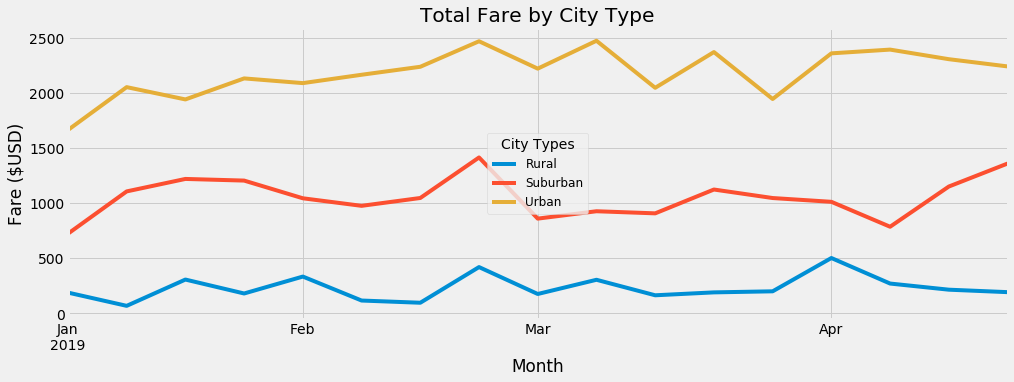

In [133]:
#Using the object-oriented interface method, plot the DataFrame you created in Step 12 using the df.plot() function
#Assuming the instruction was incorrect, and was actually referring to Step 11
plt.style.use('fivethirtyeight')
ax=resample_df.plot.line(title="Total Fare by City Type",figsize=(15, 5),label="City Type")
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
lgnd = plt.legend(fontsize="12", title="City Types")
# Save the figure.
plt.savefig("analysis/Challenge.png")
plt.show()